190.10452029421165


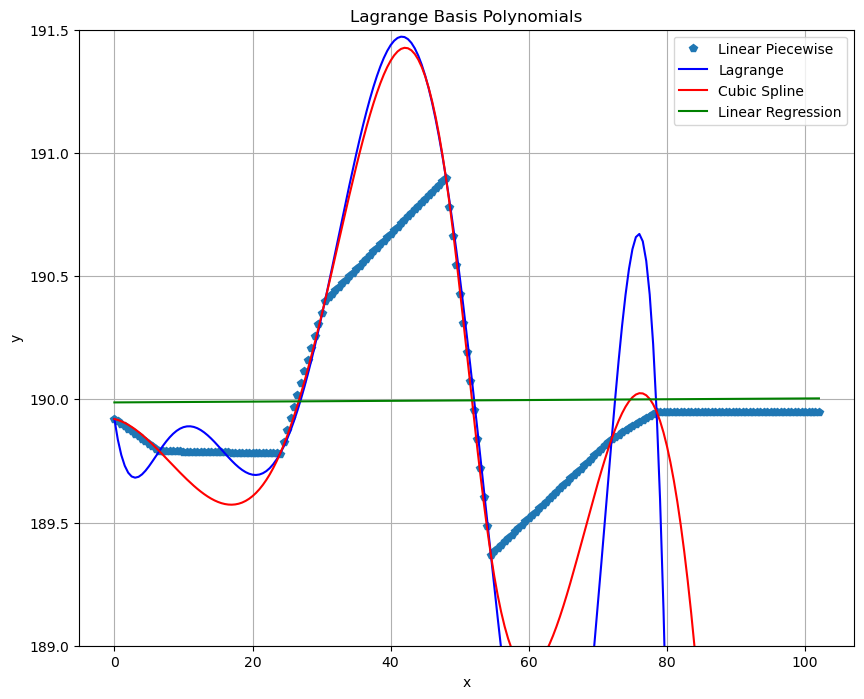

Linear Piecewise Closing Price Guess: 189.95
Lagrange Interoplation Closing Price Guess: -302.7334185306878
Cubic Spline Interpolation Closing Price Guess: 171.58907458255047
Linear Regression Closing Price Guess: [190.00389576]


In [32]:
import numpy as np
from scipy.interpolate import CubicSpline, interp1d, lagrange
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Prices for Apple for the week of Nov. 27th (open, close, open, close, etc)
aapl_close_prices = [189.92, 189.79, 189.78, 190.40, 190.90, 189.37, 189.84, 189.95]

#number hours from open at 9:30 am on Monday
xs = [0, 6.5, 24, 30.5, 48, 54.5, 72, 78.5]

#List of half hour intervals from 9:30am on Monday to 4pm on Friday
half_hours = [.5*i for i in range(205)]

#Creates Linear Piecewise
linear_piecwise = np.interp(x=half_hours, xp=xs, fp=aapl_close_prices)

#Creates Lagrange Interoplation 
lagrange_interp = lagrange(xs, aapl_close_prices)
prices_lagrange = lagrange_interp(half_hours)

#Creates Cubic Spline Interpolation
cubic_spline = CubicSpline(xs, aapl_close_prices, extrapolate=True)
prices_cubic = cubic_spline(half_hours)

#Creates Regression Model 
xr = np.array(xs).reshape(-1, 1)
half_hours_r = np.array(half_hours).reshape(-1,1)

apple_price_model = LinearRegression()
apple_price_model.fit(xr, aapl_close_prices)
apple_model_prices = apple_price_model.predict(half_hours_r)

fig = plt.figure(figsize = (10,8))

print(np.polyval(quad_coef, 24))

#Linear Piecwise Interp
plt.plot(half_hours, linear_piecwise, 'p', label = 'Linear Piecewise')

#Lagrange Interpolation
plt.plot(half_hours, prices_lagrange, 'b', label = 'Lagrange')

#Cubic Spline Interpolation
plt.plot(half_hours, prices_cubic, 'r', label = 'Cubic Spline')

#Regression Model
plt.plot(half_hours, apple_model_prices, 'g', label = 'Linear Regression')

plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.ylim(189, 191.5)
plt.show()

close_time = np.array([102.5]).reshape(-1,1)
print("Linear Piecewise Closing Price Guess: "+str(np.interp(x=102.5, xp=xs, fp=aapl_close_prices)))
print("Lagrange Interoplation Closing Price Guess: "+str(lagrange_interp(102.5)))
print("Cubic Spline Interpolation Closing Price Guess: "+str(cubic_spline(102.5)))
print("Linear Regression Closing Price Guess: "+str(apple_price_model.predict(close_time)))